# Load Packages and Data

## Packages

In [22]:
import geopandas as gpd
import fiona
import matplotlib.pyplot as plt

## Links and Variables

In [23]:
# Data pulled from Community Snow Obs Website
data = 'cso-data.geojson'

# boundary KML File form snowex Flights
boundaries = 'Boundary_KMLs/PLAN_1585_v01_all_swaths_Jan22-May7.kml'



## Read in the Datasets

In [38]:
# Read in the CSO Data
df = gpd.read_file(data)

# use fiona to load in the kml files from the flight boundaries
gpd.io.file.fiona.drvsupport.supported_drivers['KML'] = 'rw'
flight_bound = gpd.read_file(boundaries, driver='KML')

flight_bound

,Name,Description,geometry
0,alamos_35915 Radar swath,,"POLYGON ((-106.54263 35.69443, -106.30516 35.6..."
1,irnton_01406 Radar swath,,"POLYGON ((-107.90969 37.71257, -107.67724 37.6..."
2,peeler_13711 Radar swath,,"POLYGON ((-107.14932 39.11146, -107.32840 38.9..."
3,peeler_31619 Radar swath,,"POLYGON ((-106.85130 38.77560, -106.67695 38.9..."
4,grmesa_27416 Radar swath,,"POLYGON ((-107.87156 38.94870, -107.85343 39.1..."
5,grmesa_09305 Radar swath,,"POLYGON ((-108.38061 39.11693, -108.39273 38.9..."
6,rockmt_14107 Radar swath,,"POLYGON ((-105.91885 40.72144, -106.11447 40.6..."
7,fraser_23307 Radar swath,,"POLYGON ((-105.44841 40.05776, -105.59997 40.2..."
8,fraser_05209 Radar swath,,"POLYGON ((-106.03598 39.87864, -105.88277 39.7..."
9,rockmt_32109 Radar swath,,"POLYGON ((-105.74316 40.25068, -105.54790 40.3..."


## Check the projections and metadata of each dataset

In [37]:
# do the projections match?
TF = flight_bound.crs == df.crs # test if they are equal
print(f'Do the flight and point data have the same projection: {TF} \n')

print('What Projection are they in: ')
print(f'CSO Depth Projection: {df.crs}')
print(f'Snowex Flight Projection: {flight_bound.crs}')

Do the flight and point data have the same projection: True 

What Projection are they in: 
CSO Depth Projection: epsg:4326
Snowex Flight Projection: epsg:4326


# Visualize

## Test Plot

<AxesSubplot:>

<Figure size 3600x3600 with 0 Axes>

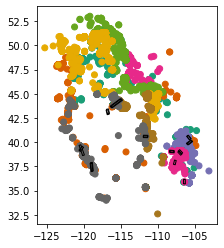

In [25]:
fig = plt.figure(figsize=(50, 50))
ax1 = df.plot(cmap = 'Dark2')
flight_bound.plot(ax = ax1 , facecolor = 'none' , edgecolor = 'black')

## Clip to the boundaries

In [44]:
polyfield = "Name"
joined = gpd.sjoin(left_df=df, right_df=flight_bound, how='left') #Join
joined = [col for col in joined.columns if col in joined or col == polyfield] #Keep all point columns and "polyfield"
joined
df

,id,author,depth,source,timestamp,elevation,_ms,geometry
1,60GVICI+,Mitchell Creelman,29.999999,MountainHub,2021-03-10T21:21:56,1660.992554,1615411316309,POINT (-116.12248 43.73602)
2,ofjvwkTY,Lane Eliotty Meyer,53.339999,MountainHub,2021-02-04T21:15:42,1243.704224,1612473342519,POINT (-115.82870 43.84358)
94,8cgYMOZT,Hans-Peter Marshall,241.300000,MountainHub,2021-04-07T16:38:33,1872.865479,1617813513582,POINT (-115.66273 43.93685)
95,58agJLRJ,Josh Butler,103.000000,MountainHub,2021-04-27T20:50:58,2286.416992,1619556658046,POINT (-115.67694 43.94739)
96,fKauFhgK,Josh Butler,101.000000,MountainHub,2021-04-27T20:45:36,2286.399658,1619556336758,POINT (-115.67694 43.94739)
...,...,...,...,...,...,...,...,...
11367,a8Z68WHN,Steve Reynaud,85.000000,SnowPilot,2018-01-06T00:00:15,2526.444092,1515196815000,POINT (-119.97453 38.72019)
11368,+txhT0mq,David Reichel,215.000000,SnowPilot,2021-03-21T18:00:00,2545.037109,1616349600000,POINT (-119.98280 38.71911)
11369,tjtMCzwu,David Reichel,55.000000,SnowPilot,2020-12-03T18:00:00,2560.317383,1607018400000,POINT (-119.98647 38.69135)
11370,WpwmBL3x,David Reichel,75.000000,SnowPilot,2020-12-12T23:00:00,2489.232422,1607814000000,POINT (-119.98684 38.69110)


In [41]:
df = gpd.clip(df , flight_bound) # clip the dataframe to the flight boundaries
df # Run a check of number of rows

,id,author,depth,source,timestamp,elevation,_ms,geometry
1,60GVICI+,Mitchell Creelman,29.999999,MountainHub,2021-03-10T21:21:56,1660.992554,1615411316309,POINT (-116.12248 43.73602)
2,ofjvwkTY,Lane Eliotty Meyer,53.339999,MountainHub,2021-02-04T21:15:42,1243.704224,1612473342519,POINT (-115.82870 43.84358)
94,8cgYMOZT,Hans-Peter Marshall,241.300000,MountainHub,2021-04-07T16:38:33,1872.865479,1617813513582,POINT (-115.66273 43.93685)
95,58agJLRJ,Josh Butler,103.000000,MountainHub,2021-04-27T20:50:58,2286.416992,1619556658046,POINT (-115.67694 43.94739)
96,fKauFhgK,Josh Butler,101.000000,MountainHub,2021-04-27T20:45:36,2286.399658,1619556336758,POINT (-115.67694 43.94739)
...,...,...,...,...,...,...,...,...
11367,a8Z68WHN,Steve Reynaud,85.000000,SnowPilot,2018-01-06T00:00:15,2526.444092,1515196815000,POINT (-119.97453 38.72019)
11368,+txhT0mq,David Reichel,215.000000,SnowPilot,2021-03-21T18:00:00,2545.037109,1616349600000,POINT (-119.98280 38.71911)
11369,tjtMCzwu,David Reichel,55.000000,SnowPilot,2020-12-03T18:00:00,2560.317383,1607018400000,POINT (-119.98647 38.69135)
11370,WpwmBL3x,David Reichel,75.000000,SnowPilot,2020-12-12T23:00:00,2489.232422,1607814000000,POINT (-119.98684 38.69110)


## Plot it again

<AxesSubplot:>

<Figure size 3600x3600 with 0 Axes>

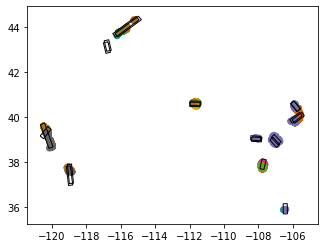

In [28]:
fig = plt.figure(figsize=(50, 50))
ax1 = df.plot(cmap = 'Dark2')
flight_bound.plot(ax = ax1 , facecolor = 'none' , edgecolor = 'black')